<a href="https://colab.research.google.com/github/unnryakuzi/gakusai/blob/master/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
print("test2")
num = 11

test


markdown形式で説明書きができる。

In [0]:
print(num)#numは11

11


In [0]:

from google.colab import drive
drive.mount('/content/drive')
!ls 'drive/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
'My Drive'


In [0]:
import sympy as sym
from sympy.plotting import plot
sym.init_printing(use_unicode=True)
%matplotlib inline

In [0]:
a, b, c, x, y = sym.symbols("a b c x y")

In [0]:
a = sym.Symbol('a')
f = sym.Function('f')
g = sym.Function('g')
expr = 12*x*(1-x)*(1-x)

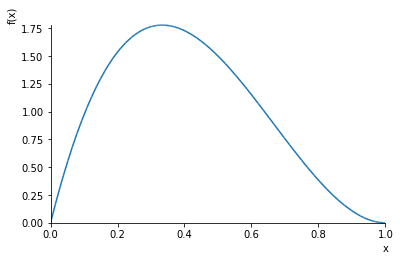

In [0]:
plot(expr, (x, 0, 1))

In [0]:
import random

In [0]:
print(random.randint(1,50))
A =[i for i in range(10)]
print(A)

20
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import timedelta
import datetime
import matplotlib.dates as mdates
from matplotlib.font_manager import FontProperties
import math
#from pandas.plotting import register_matplotlib_converters
#register_matplotlib_converters()

# フォントはMSゴシック
#fp_1 = FontProperties(fname='C:\WINDOWS\Fonts\msgothic.ttc', size=16)

# 指数関数のパラメータ
k = 0.14
A = 0.03

# 感染源候補者の範囲
kansen_days = 28
td = timedelta(days=kansen_days+1)

# 東京都の感染者データ読込み
df = pd.read_csv(
    "https://stopcovid19.metro.tokyo.lg.jp/data/130001_tokyo_covid19_patients.csv")
df = df[['公表_年月日']]

# 日次集計
df['count'] = 1
df = df.groupby('公表_年月日').agg({'count': np.sum})
df = df.reset_index()
start_at, end_at = df.公表_年月日.min(), df.公表_年月日.max()
df.index = df.公表_年月日

# 感染源候補者数算出
start_at = datetime.datetime.strptime(start_at, '%Y-%m-%d')
dates_DF = pd.DataFrame(index=pd.date_range(start_at-td, end_at, freq="D"))
df = df.merge(dates_DF, how="outer", left_index=True, right_index=True)
df = pd.DataFrame(df['count'].fillna(0).astype(int))
df2 = pd.DataFrame(df.rolling(kansen_days+1).sum().fillna(0).astype(int))
df2 = df2.rename(columns={'count': '感染源候補者数'})

# 1つのDataFrameにまとめる
res = df.merge(df2, how="outer", left_index=True, right_index=True)
res = res.rename(columns={'count': '感染者公表数'})
res = res[start_at:end_at]
res['感染源候補者数'] = res['感染源候補者数'] - res['感染者公表数']
res['感染源候補者数の増分'] = res['感染源候補者数'].diff().fillna(0).astype(int)
res['k'] = res['感染源候補者数の増分'] / res['感染源候補者数']

# 指数関数の値を計算
serial_num = pd.RangeIndex(start=1, stop=len(res.index) + 1, step=1)
res['No'] = serial_num


def f(x): return (A * math.exp(k*x))


res['Aexpkx'] = res['No'].apply(f)

# 描画
fig = plt.figure(figsize=(12, 8))
plt.subplots_adjust(wspace=0.5, hspace=0.9)

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

ax1.plot(res['感染者公表数'])
ax2.plot(res['感染源候補者数'])
ax3.plot(res['k'])

ax4.plot(res['感染源候補者数'])
ax4.plot(res['Aexpkx'])
# 軸目盛の設定
ax1.xaxis.set_major_locator(
    mdates.WeekdayLocator(byweekday=mdates.SU, tz=None))
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
ax1.set_title('感染者公表数', fontproperties=fp_1)
ax1.grid()
ax2.xaxis.set_major_locator(
    mdates.WeekdayLocator(byweekday=mdates.SU, tz=None))
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
ax2.set_title('感染源候補者数', fontproperties=fp_1)
ax2.grid()
ax3.xaxis.set_major_locator(
    mdates.WeekdayLocator(byweekday=mdates.SU, tz=None))
ax3.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
ax3.set_title('k(1日当たり感染源候補者を何人増やすか)', fontproperties=fp_1)
ax3.grid()
ax4.xaxis.set_major_locator(
    mdates.WeekdayLocator(byweekday=mdates.SU, tz=None))
ax4.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
ax4.set_title('y=A・exp(kt)', fontproperties=fp_1)
ax4.grid()

# 軸目盛ラベルの回転
labels1 = ax1.get_xticklabels()
labels2 = ax2.get_xticklabels()
labels3 = ax3.get_xticklabels()
labels4 = ax4.get_xticklabels()
plt.setp(labels1, rotation=45, fontsize=10)
plt.setp(labels2, rotation=45, fontsize=10)
plt.setp(labels3, rotation=45, fontsize=10)
plt.setp(labels4, rotation=45, fontsize=10)


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

FileNotFoundError: ignored

<Figure size 864x576 with 4 Axes>